# `Optuna` optimization analysis - D1_20241109_114242

Nota: la prima cosa che si osserva dal post-processing è che il DRAG ha fallito, anche questo può aver influito sulla ottimizzazione con `optuna`.

Le RB per cui l'incertezza sulla fidelity è di molto superiore all'unità sono RB in cui per qualche motivo il fit non funziona (presumibilmente i parametri scelti non sono adatti.)

In [1]:
import optuna
from optuna.visualization import (
    plot_optimization_history,
    plot_param_importances,
    plot_edf,
    plot_parallel_coordinate,
    plot_slice,
    plot_contour
)
import matplotlib.pyplot as plt
from pathlib import Path


/home/elisa/calibration/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
WIDTH  = 0.5
FONT = 24

BLUE = "#788ae3"
RED = "#d1545e"
DARKBLUE = "#075cb3"
DARKRED = "#8c1822"

### Load study from database

In [4]:
target = "D1"
study_name = "20241118_151919"
path = f"../../optuna_data/D1_20241118_151919.db"

# Construct SQLAlchemy URL
db_path = f"sqlite:///{path}"
print(db_path)

study = optuna.load_study(study_name=study_name, storage=db_path)

sqlite:///../../optuna_data/D1_20241118_151919.db


## Objeptimization analysis with optuna tools

In [6]:
optuna.visualization.plot_optimization_history(study).show()
optuna.visualization.plot_parallel_coordinate(study).show()

In [7]:
optuna.visualization.plot_param_importances(study).show()

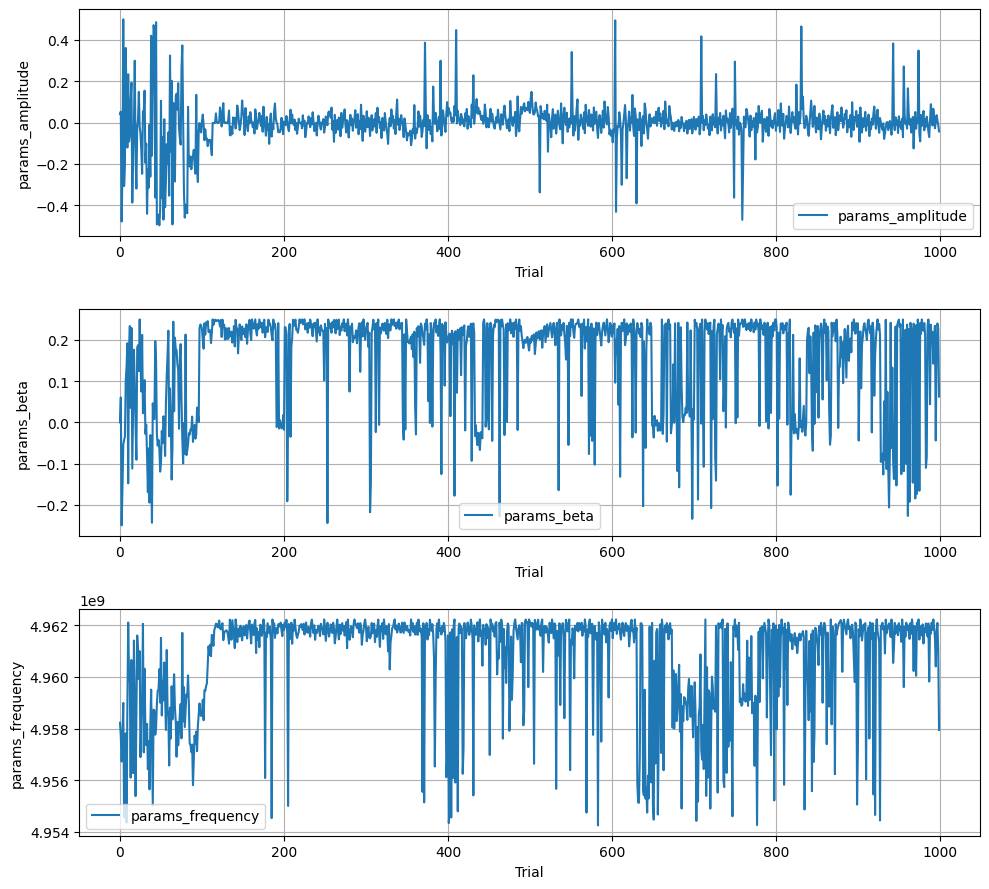

In [8]:
# Get all trials and plot parameter histories individually
trials = study.trials_dataframe()

# Separate plots for each parameter
params_columns = [col for col in trials.columns if col.startswith("params_")]

fig, axes = plt.subplots(len(params_columns), 1, figsize=(10, len(params_columns) * 3))

for i, param in enumerate(params_columns):
    ax = axes[i]
    ax.plot(trials["number"], trials[param], label=param)
    ax.set_xlabel("Trial")
    ax.set_ylabel(param)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


## Optimization analysis

In [9]:
df = study.trials_dataframe()

#NB: objective value is RB infidelity
objective_values = df['value'].to_numpy()
objective_error = df['user_attrs_error'].to_numpy()
iterations = df['number']

#build params dictionary
params = {par: df[par].dropna().to_numpy() for par in params_columns}
print(params)

{'params_amplitude': array([ 4.11044451e-02,  5.26479186e-02, -4.77584860e-01, -2.34238638e-01,
        4.98096897e-01, -3.06264107e-01, -2.01655612e-01,  3.59794809e-01,
        8.12292582e-02, -1.20708515e-01,  2.33133373e-01, -9.19516041e-02,
       -6.27893806e-02,  1.12954572e-01,  1.92073778e-01, -3.86342719e-01,
       -1.33621388e-01, -5.35087940e-03,  2.98249186e-01, -1.72699137e-01,
       -3.18727289e-01, -2.39361117e-02,  1.64181193e-02,  1.47802030e-01,
       -1.91749356e-02, -5.40903219e-02, -1.34287181e-01, -2.47291430e-01,
        5.39014662e-02,  5.31255930e-02,  1.53997057e-01, -1.94002690e-01,
       -1.01776952e-01, -4.40399766e-01, -2.26800970e-01, -3.14678554e-01,
       -1.02094612e-02, -2.61203737e-01,  4.18678674e-01, -1.59876533e-01,
        2.67822632e-01,  4.69722639e-01,  4.30670941e-01, -3.61811937e-01,
        4.84274513e-01, -4.91002620e-01, -4.79555430e-01, -4.44520097e-01,
       -4.95866991e-01, -4.19714270e-01,  1.05171244e-01, -3.65466597e-01,
    

/tmp/ipykernel_188637/806558833.py:8: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



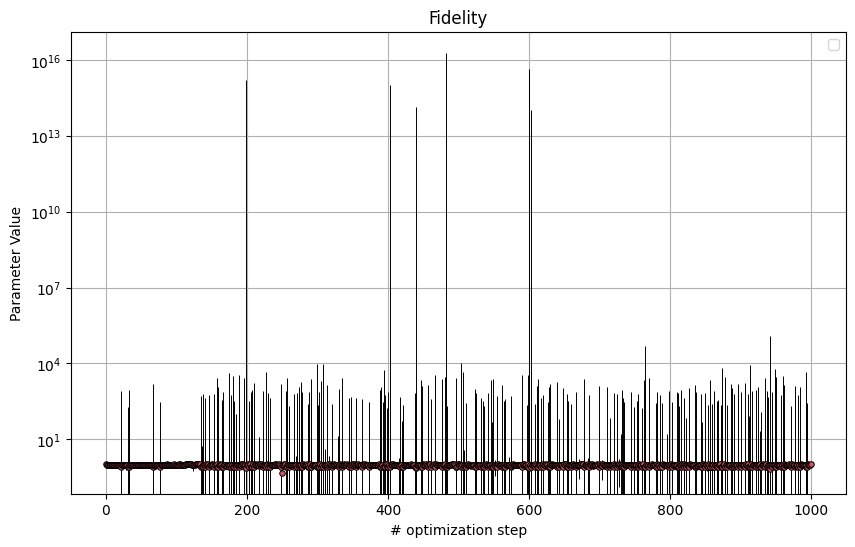

In [10]:
plt.figure(figsize=(10, 6))
plt.errorbar(iterations, 1-objective_values, yerr=objective_error, fmt = 'o', markersize=4, color='black', linestyle='-',
         markerfacecolor=RED, markeredgewidth=0.7, linewidth=0.7, alpha=1)
plt.xlabel('# optimization step')
plt.ylabel('Parameter Value')
plt.yscale('log')
plt.title(f'Fidelity')
plt.legend()
plt.grid()
plt.show()

In [11]:
for i in range(len(objective_values)):
    if 1-objective_values[i] + objective_error[i] > 1:
        print(i)

22
28
31
32
66
69
76
77
115
117
123
135
136
137
138
140
142
144
146
151
153
156
157
159
162
163
164
165
166
170
172
174
177
180
182
185
188
194
195
198
199
203
205
206
207
210
217
220
221
222
226
227
228
230
233
240
245
248
254
255
257
259
266
269
270
271
273
276
278
280
286
287
288
290
291
299
301
302
303
305
308
310
313
316
320
322
326
329
330
332
333
334
336
337
341
345
347
354
358
362
363
373
389
390
393
394
396
397
399
400
403
416
417
420
421
430
433
436
438
439
440
446
448
456
461
467
477
480
482
483
487
491
494
496
497
498
504
506
507
509
511
514
523
525
528
531
532
535
536
541
546
548
549
552
555
562
563
565
566
567
572
574
575
590
597
599
600
602
603
608
611
613
617
619
627
628
629
639
643
648
654
655
659
666
671
678
680
684
685
690
699
704
710
714
720
725
727
730
732
733
735
739
745
748
753
754
755
760
763
764
765
770
780
782
785
786
789
791
796
798
799
803
809
811
813
815
819
820
823
827
828
835
837
838
843
845
849
850
852
853
856
857
860
862
867
868
872
873
874
875
876
877


/tmp/ipykernel_188637/3497117488.py:8: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



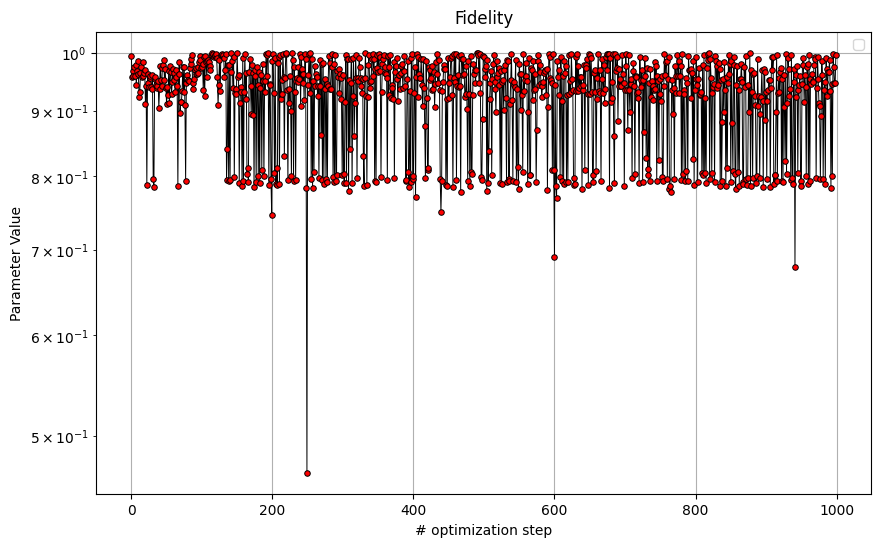

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(iterations, 1 - objective_values, 'o-', markersize=4, color='black', 
         markerfacecolor='red', markeredgewidth=0.7, linewidth=0.7, alpha=1)
plt.xlabel('# optimization step')
plt.ylabel('Parameter Value')
plt.yscale('log')
plt.title(f'Fidelity')
plt.legend()
plt.grid()
plt.show()

/tmp/ipykernel_188637/4155222761.py:19: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



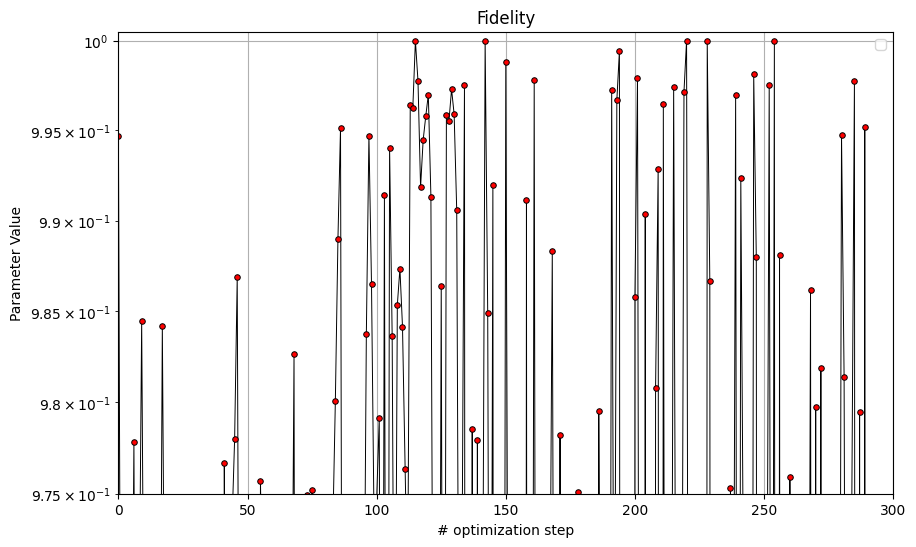

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(
    iterations,
    1 - objective_values,
    "o-",
    markersize=4,
    color="black",
    markerfacecolor="red",
    markeredgewidth=0.7,
    linewidth=0.7,
    alpha=1,
)
plt.xlabel("# optimization step")
plt.ylabel("Parameter Value")
plt.yscale("log")
plt.xlim((-0.1,300))
plt.ylim((9.75e-1, 1.0005))
plt.title(f"Fidelity")
plt.legend()
plt.grid()
plt.show()

In [20]:
best_trial = study.best_trial

print("Best trial:")
print(f"  Trial number: {best_trial.number}")
print(f"  Value (Objective): {best_trial.value}")
print("  Parameters:")

for param_name, param_value in best_trial.params.items():
    print(f"    {param_name}: {param_value}")

print(f"fidelity: {1-best_trial.value}")

Best trial:
  Trial number: 220
  Value (Objective): -5.958757226901905e-08
  Parameters:
    amplitude: -0.003275245706683305
    frequency: 4961931909.35706
    beta: 0.24161800815381793
fidelity: 1.0000000595875722


## Inspectring database structure

In [21]:
print("Columns in Optuna study trials DataFrame")
print(df.info())
print(df.head())

Columns in Optuna study trials DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   number                     1000 non-null   int64          
 1   value                      1000 non-null   float64        
 2   datetime_start             1000 non-null   datetime64[ns] 
 3   datetime_complete          1000 non-null   datetime64[ns] 
 4   duration                   1000 non-null   timedelta64[ns]
 5   params_amplitude           1000 non-null   float64        
 6   params_beta                1000 non-null   float64        
 7   params_frequency           1000 non-null   float64        
 8   user_attrs_error           1000 non-null   float64        
 9   system_attrs_fixed_params  1 non-null      object         
 10  state                      1000 non-null   object         
dtypes: datetime64[ns